# NLP

Processamento de Linguagem Natural

Nesse projeto será realizado limpeza de dados para processamento de lingagem natural que será trabalhado com modelos de machine Learn


## IMPORTANDO NUMPY E PANDAS
Importando pandas e numpy para trablhaar com os dados necessários.

In [52]:
import pandas as pd
import numpy as np

## IMPORTANDO DADOS

Importando base de dados baixadas em [kaggle - IMDB PT BR](https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr?resource=download)

Os dados são resenhas de filmes do IMDB que foram traduzidos para o português brasil atravez de ferramentas automáticas.

In [53]:
resenhas = pd.read_csv('Downloads/archive/imdb-reviews-pt-br.csv')
resenhas.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1  Este é um exemplo do motivo pelo qual a maiori...       neg  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg  
4  Filmes de fotos de latão não é uma palavra apr...       neg

In [54]:
print('NEGATIVO \n')

print(f'''{resenhas.text_pt[1200]}''')

NEGATIVO 

O filme é mais ou menos assim: corra ao redor, corra por aí, alguém matou, muitos surtam e então um dos gritos do grupo grita "Puxe juntos" ou "Apenas se acalme!" Repita isso quantas vezes forem os caracteres restantes. Entre essas coisas, você pode desfrutar de uma tela preta em branco. Estes não são rápidos, mas sim vários segundos de duração. Eu ficava pensando que desperdício de filme toda vez que acontecia - sim, acontece mais de uma vez se você pode acreditar. Eu noto outras mencionadas "Bruxa de Blair: e isso me fez lembrar disso na maneira como a câmera era animada. No entanto, este filme leva isso ao extremo.Toda vez que os personagens se movem, a câmera está pulando.Às vezes, tanta coisa que você não pode fazer cabeças ou contos sobre o que você está olhando.Isso nos traz à iluminação.Muito escuro em alguns Eu entendo que eles estão tentando nos fazer sentir como se estivéssemos em uma caverna, mas Helllloo ... Eu estou assistindo um filme aqui, seria bom poder ver

## SEPARANDO DADOS

Seprando dados em Treino e Teste respectivamente em Train e Test para o X = Features e Y = Class

In [55]:
from sklearn.model_selection import train_test_split

SEED = 123
np.random.seed(SEED)

x = resenhas['text_pt']
y = resenhas['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state=SEED,
                                                    stratify=y,
                                                    test_size=0.25)

print(f'TRAIN X SIZE : {x_train.shape}')
print(f'TEST X SIZE  : {x_test.shape}')
print(f'TRAIN Y SIZE : {y_train.shape}')
print(f'TEST Y SIZE  : {y_test.shape}')

TRAIN X SIZE : (37094,)
TEST X SIZE  : (12365,)
TRAIN Y SIZE : (37094,)
TEST Y SIZE  : (12365,)


# TRANTANDO DADOS TEXTUAIS

* **BAGS_OF_WORDS**
* **WORD_CLOUD**
* **MLKT_FREQUENCIA_DISTRIBUIDA**
* **STOP_WORDS**


In [56]:
resenhas['classificacao'] = resenhas['sentiment'].replace(['neg', 'pos'], [0,1])
resenhas.tail()

id                                            text_en  \
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificacao  
49454              1  
49455              1  
49456              1  
49457              1  
49458              1

## BAGS OF WORDS

Saco de palavras, ou seja separar palavras de um texto individualmente contar a quantidade de vezes que essa palavra aparece em um texto para verificar aparições de palavras em vetores.


In [57]:
from sklearn.feature_extraction.text import CountVectorizer

textos = ['Assistir um filme ótimo', 'Assistir um filme ruim']

vetorizados = CountVectorizer(lowercase=False)
bag_of_words = vetorizados.fit_transform(textos)

In [58]:
features_names = vetorizados.get_feature_names()

In [59]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [60]:
matriz = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizados.get_feature_names())

In [61]:
matriz.head()

Assistir  filme  ruim  um  ótimo
0         1      1     0   1      1
1         1      1     1   1      0

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

vetorizados = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizados.fit_transform(resenhas.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [63]:
SEED = 123
np.random.seed(SEED)

x = resenhas['text_pt']
y = resenhas['classificacao']

x_train, x_test, y_train, y_test = train_test_split(bag_of_words, y, 
                                                    random_state=SEED,
                                                    stratify=y,
                                                    test_size=0.25)

print(f'TRAIN X SIZE : {x_train.shape}')
print(f'TEST X SIZE  : {x_test.shape}')
print(f'TRAIN Y SIZE : {y_train.shape}')
print(f'TEST Y SIZE  : {y_test.shape}')

TRAIN X SIZE : (37094, 50)
TEST X SIZE  : (12365, 50)
TRAIN Y SIZE : (37094,)
TEST Y SIZE  : (12365,)


In [64]:
from sklearn.linear_model import LogisticRegression

def classificar_texto(texto, coluna_features, coluna_class):
    
    # Cria Bag of words para cada uma das resenhas na columm com nome coluna_features
    vetorizados = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizados.fit_transform(texto[coluna_features])
    
    # Seta um seed randomico para não ter problemas com outras resultados nos testes
    SEED = 123
    np.random.seed(SEED)

    # define quais serão a features e quais serão as class para o treino e teste.
    x = bag_of_words
    y = resenhas[coluna_class]

    x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                        random_state=SEED,
                                                        stratify=y,
                                                        test_size=0.25)

    # Realiza o modelo de predição linear com machine learn
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(x_train, y_train)
    acuracia = (regressao_logistica.score(x_test, y_test)*100).round(2)
    print(f'A ACURACIA PARA ESTE MODELO É DE {acuracia} (%) ')
    
classificar_texto(resenhas, 'text_pt', 'classificacao')

A ACURACIA PARA ESTE MODELO É DE 65.48 (%) 


## WORD CLOUD

Nuvem de palavras é uma estratégia que pode ser usado para representar diversas palavras e sua frequencia de aparecimento em um texto X, essa estratégica ajuda a verificar quais palavras estão em maior frequencia dentre algum resultado especifico e validar a relevacia da palavra para testes em machine learn.


In [65]:
!pip install wordcloud
!pip install --upgrade pip 
!pip install --upgrade Pillow

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\kaiuc\anaconda3\python.exe -m pip install --upgrade pip


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [66]:
%matplotlib inline

from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenhas['text_pt']])

nuvem = WordCloud(width=800, height=500,
                 max_font_size=110,
                 collocations=False).generate(todas_palavras)


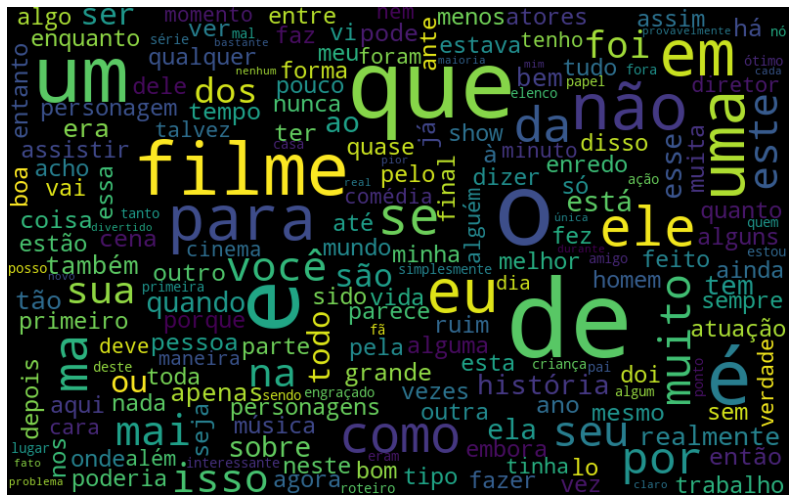

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,9))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.show()

In [68]:
def nuvem_generation_neg(text, coluna_texto): 
    resenhas_pos = text.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in resenhas_pos[coluna_texto]])

    nuvem_positivas = WordCloud(width=800, height=500,
                     max_font_size=110,
                     collocations=False).generate(todas_palavras)
    
    plt.figure(figsize=(14,9))
    plt.imshow(nuvem_positivas, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [69]:
def nuvem_generation_pos(text, coluna_texto): 
    resenhas_pos = text.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in resenhas_pos[coluna_texto]])

    nuvem_positivas = WordCloud(width=800, height=500,
                     max_font_size=110,
                     collocations=False).generate(todas_palavras)
    
    plt.figure(figsize=(14,9))
    plt.imshow(nuvem_positivas, interpolation='bilinear')
    plt.axis('off')
    plt.show()

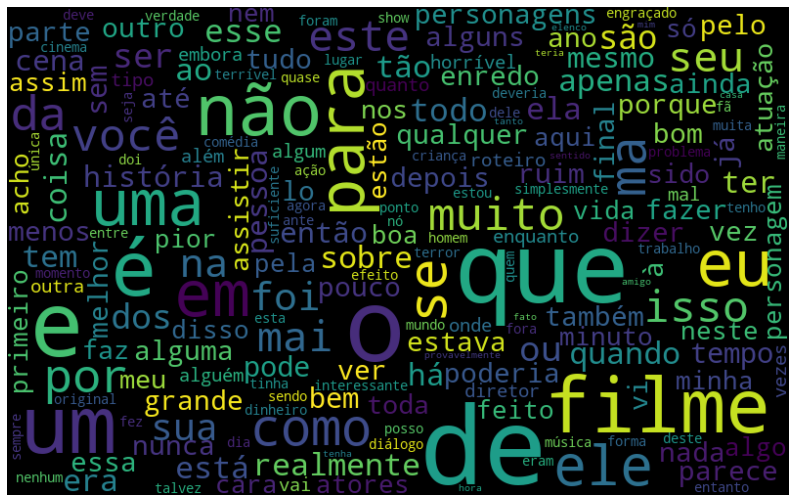

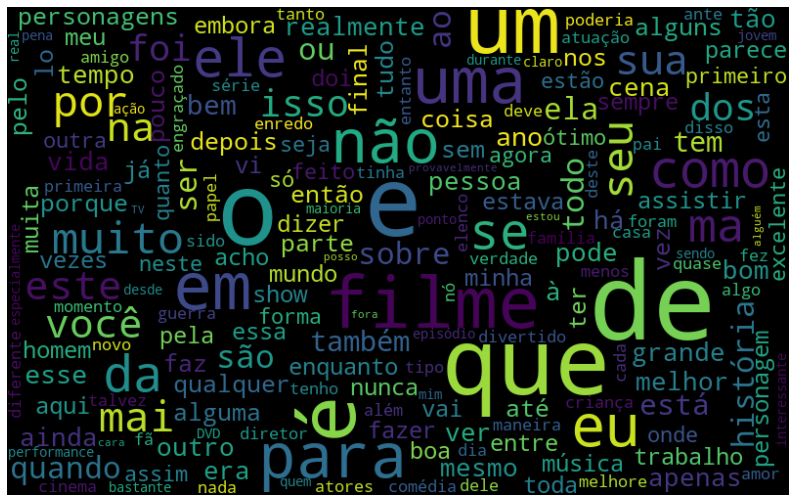

In [70]:
nuvem_generation_neg(resenhas, 'text_pt')
nuvem_generation_pos(resenhas, 'text_pt')

## MLTK e Tokenirização
 
Biblioteca python que possuie algoritmos para várias e diferentes linguas.
precisa instalar os datasets e algoritmos.


In [71]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nps_chat is already up-to-date!
[nltk_data]    | Downloading package omw to
[nltk_d

[nltk_data]    |   Package webtext is already up-to-date!
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wmt15_eval is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet2022 to
[nltk_data]    |     C:\Users\kaiuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2022 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to

True

In [72]:
# Informar dados para o Freque Dist
frase = ['Um filme ruim', 'um filme bom']
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'Um filme ruim': 1, 'um filme bom': 1})

In [73]:
from nltk import tokenize

In [74]:
#  cirar um Tokenizem com buildfunction whitespaceTokenize
frase = "Bem vindo ao mundo do PLN!"
token_espacos = tokenize.WhitespaceTokenizer()

In [75]:
token_frase = token_espacos.tokenize(frase)

In [76]:
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [77]:
token_frase = token_espacos.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [78]:
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [79]:
df_frequencias = pd.DataFrame({'palavras': list(frequencia.keys()), 'frequencia': list(frequencia.values())})
df_frequencias.nlargest(columns = 'frequencia', n=10)

palavras  frequencia
20        de      417651
14       que      325070
42         e      299743
3          o      244881
7         um      216410
102        a      210179
45         é      192381
200       em      132778
1        uma      130888
29       não      127915

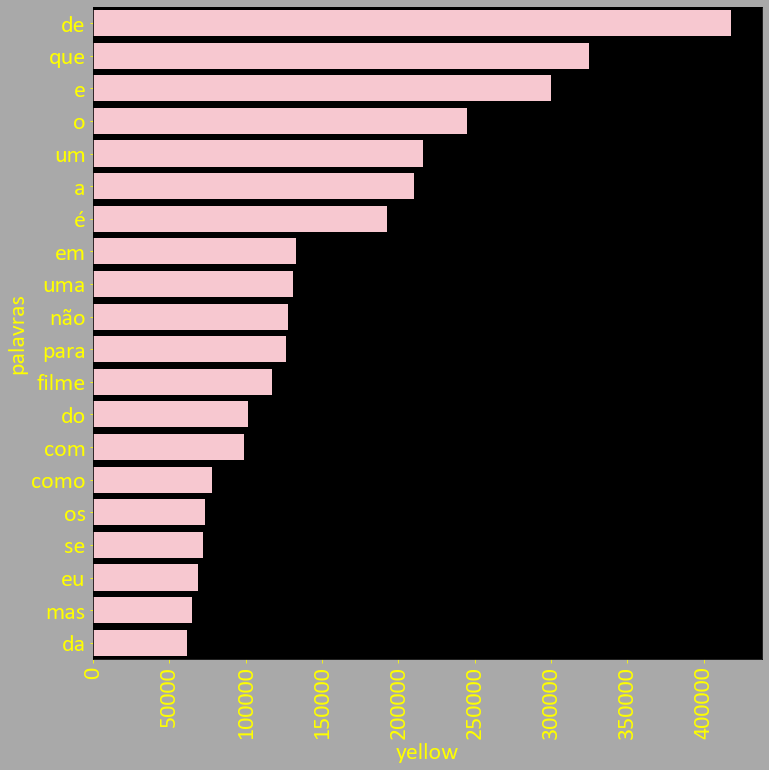

In [80]:
import seaborn as sns
import matplotlib as mpl

COLOR = 'yellow'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
font = {'family' : 'Calibri',
        'size'   : 24}

mpl.rc('font', **font)

plt.figure(figsize=(12,12), facecolor='darkgray')
plt.xticks(rotation=90)
ax = sns.barplot(data=df_frequencias.nlargest(columns='frequencia', n=20), y='palavras', x='frequencia', color='pink')
ax.set(xlabel='yellow')
ax.set_facecolor("black")

plt.show()


In [81]:
def gera_freq_graph(text, columns_texto, quantidade):
    '''
    nome função: Gera grafico de frequencia de palavras
    resumo: esta função recebe um dataFrame, colunas e quantidade de palavras que queremos no grafico, 
    precisa presta atenção a quantidade de palavras para não ultrapassar o limite de 30 palavras o que
    poderá corromper o gráfico.
    @params: 
       - text : [DataFrame] data-Frame com os texto 
       - columns_texto : [String] Qual a coluna do dataframe contém o texto, precisa ser uma string.
       - quantidade: [interager] total de palavras que serão geradas, precisa ser um int.
    '''
    # GERAR OS TOKENS
    todas_palavras = ' '.join([texto for texto in text[columns_texto]])
    token_espacos = tokenize.WhitespaceTokenizer()
    token_frase = token_espacos.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencias = pd.DataFrame({
        'palavras': list(frequencia.keys()), 
        'frequencia': list(frequencia.values())
    })
    frequentes = df_frequencias.nlargest(columns='frequencia', n=quantidade)
    
    # Seta configurações para o gráfico
    COLOR = 'yellow'
    mpl.rcParams['text.color'] = COLOR
    mpl.rcParams['axes.labelcolor'] = COLOR
    mpl.rcParams['xtick.color'] = COLOR
    mpl.rcParams['ytick.color'] = COLOR
    font = {'family' : 'Calibri',
            'size'   : 24}

    mpl.rc('font', **font)

    plt.figure(figsize=(12,12), facecolor='black')
    plt.xticks(rotation=90)
    ax = sns.barplot(data=frequentes, y='palavras', x='frequencia', color='pink')
    ax.set(xlabel='yellow')
    ax.set_facecolor("black")

    plt.show()

In [82]:
help(gera_freq_graph)

Help on function gera_freq_graph in module __main__:

gera_freq_graph(text, columns_texto, quantidade)
    nome função: Gera grafico de frequencia de palavras
    resumo: esta função recebe um dataFrame, colunas e quantidade de palavras que queremos no grafico, 
    precisa presta atenção a quantidade de palavras para não ultrapassar o limite de 30 palavras o que
    poderá corromper o gráfico.
    @params: 
       - text : [DataFrame] data-Frame com os texto 
       - columns_texto : [String] Qual a coluna do dataframe contém o texto, precisa ser uma string.
       - quantidade: [interager] total de palavras que serão geradas, precisa ser um int.



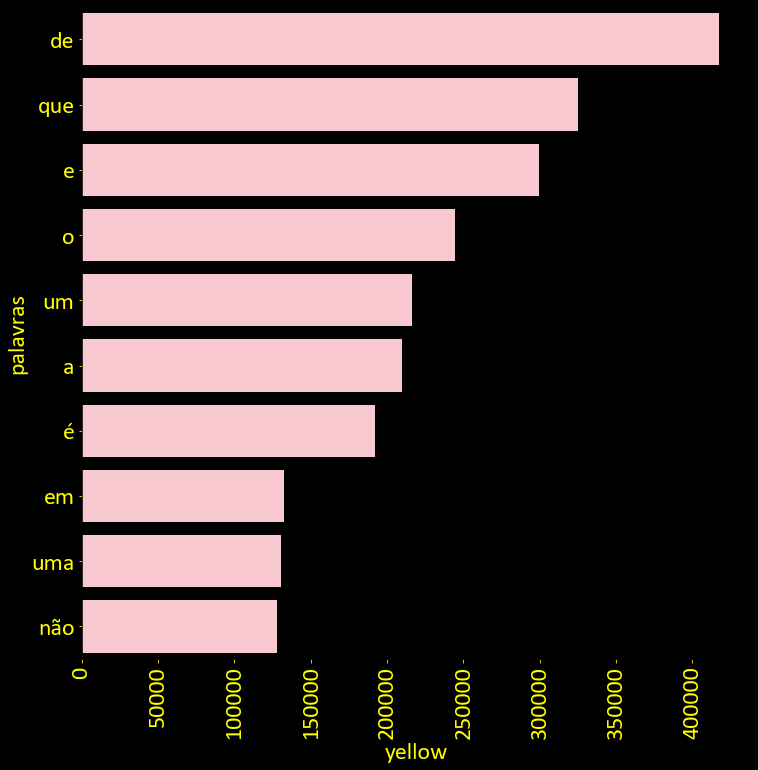

In [83]:
gera_freq_graph(resenhas, 'text_pt', 10)

In [84]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

testizinho = resenhas['text_pt'][0].split(' ')

frase_processada = list()
for linha in resenhas['text_pt']:
    nova_frase = list()
    
    palavras_texto = tokenize.WhitespaceTokenizer().tokenize(linha)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenhas['tratamento_v1'] = frase_processada


In [85]:
resenhas.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                       tratamento_v1  
0  Mais vez, Sr. Costner arrumou filme tempo nece...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis, poderiam agi...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada eles, ve...

In [86]:
classificar_texto(resenhas, 'tratamento_v1', 'classificacao')

A ACURACIA PARA ESTE MODELO É DE 68.37 (%) 


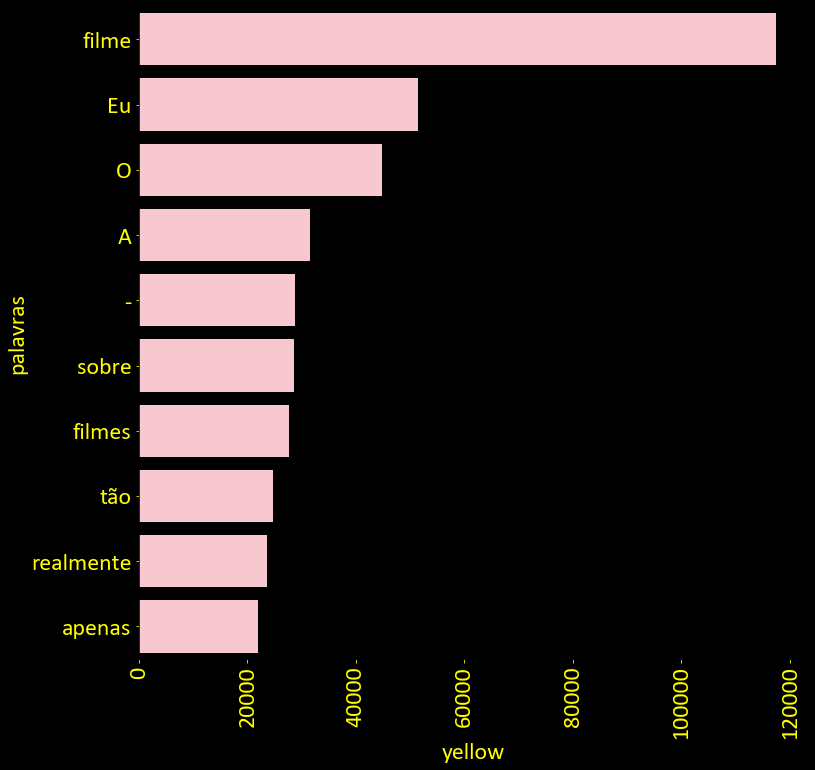

In [87]:
gera_freq_graph(resenhas, 'tratamento_v1', 10)

In [88]:
resenhas['tratamento_v1'][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [89]:
resenhas['text_pt'][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [90]:
len(resenhas['text_pt'][0])

978

In [91]:
len(resenhas['tratamento_v1'][0])

671

## SEPARAR CARACTER ESPECIAIS

Usando Tokenize podemos usar a buildfunction WordPunctTokenizer() e com a subfunction tokenizer serpara além das palavras também todos caracteres especiais.

In [92]:
from nltk import tokenize

frase = 'Olá Mundo!!!'
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
token_frase


['Olá', 'Mundo', '!!!']

In [93]:
from string import punctuation


pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)
    
pontuacao_stopwords = pontuacao + palavras_irrelevantes + ['...']

In [94]:

testizinho = resenhas['text_pt'][0].split(' ')

frase_processada = list()
for linha in resenhas['tratamento_v1']:
    nova_frase = list()
    
    palavras_texto = tokenize.WordPunctTokenizer().tokenize(linha)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenhas['tratamento_v2'] = frase_processada

In [95]:
classificar_texto(resenhas, 'tratamento_v2', 'classificacao')

A ACURACIA PARA ESTE MODELO É DE 69.03 (%) 


In [96]:
resenhas.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                       tratamento_v1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada eles, ve...   

                                       tratamento_v2  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada verdade ...

In [97]:
print(len(resenhas['tratamento_v1'][0]))
print(len(resenhas['tratamento_v2'][0]))

671
651


In [98]:
resenhas['tratamento_v1'][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [99]:
resenhas['tratamento_v2'][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

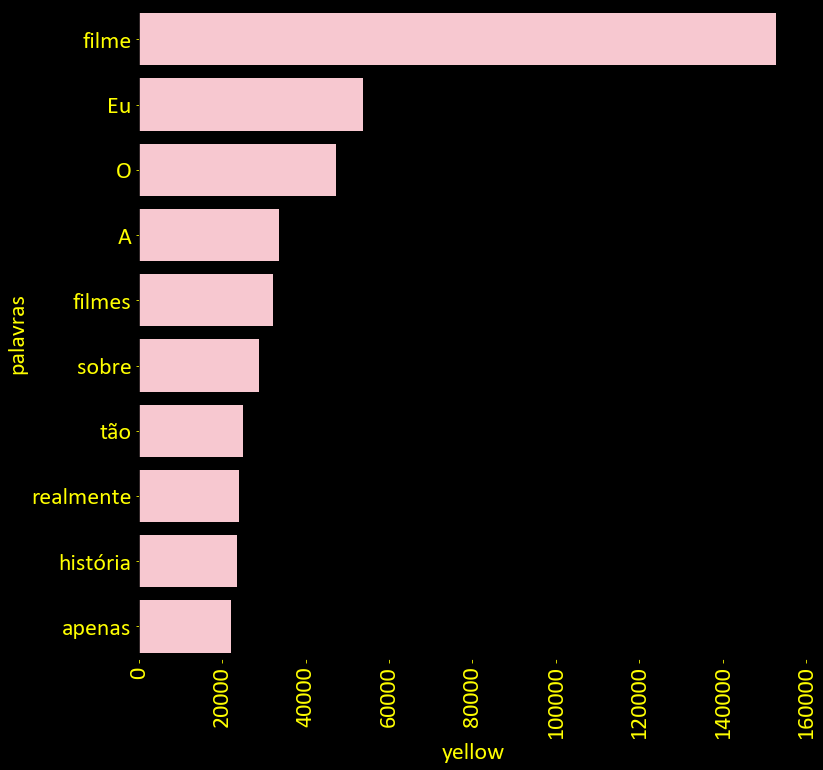

In [100]:
gera_freq_graph(resenhas, 'tratamento_v2', 10)

### REMOVER ACENTUAÇÃO

usando unicode para remover todos acentuações que serão desnecessário para a compreenção da máquina.

In [110]:
# IMPORTANDO TODAS BIBLI NECESSÁRIAS
import unidecode
import nltk
from nltk import tokenize
from string import punctuation
# CRIANDO LIST DE PALAVRAS IRELEVANTES:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

# CRIANDO LIST DE PONTUAÇÕES DESNECESSÁRIAS: 
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

# JUNTAR LISTA DE PONTUAÇõES COM STOPWORDS:
pontuacao_stopwords = pontuacao + palavras_irrelevantes + ['...']

# REMOVER ACENTUAÇÂO DAS LIST DE PUNCH + STOPWORDS
resenhas['tratamento_v3'] = [unidecode.unidecode(texto) for texto in resenhas['tratamento_v2']]

pontuacao_stopword_sem_acentos = [unidecode.unidecode(palavra) for palavra in pontuacao_stopwords]

print(pontuacao_stopwords_sem_ancentos)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 'a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'h

In [108]:
# RODA A LIMPEZA DOS ACENTOS, STOPWORDS E CARACTERES ESPECIAIS

# LISTA FINAL INICIA VAZIA
frase_processada = list()

# PARA CADA LINHA DAS RESENHAS NA COLUNA 'tratamento_v3' INTERAGE
for linha in resenhas['tratamento_v3']:
    # CRIA UMA NOVA LISTA QUE SERÁ COLOCADA NA LISTA PROCESSADA NO FINAL
    nova_frase = list()
    
    # QUEBRA AS PALAVRAS POR ESPAÇOS E POR CARACTERES ESPECIAIS
    palavras_texto = tokenize.WordPunctTokenizer().tokenize(linha)
    
    # INTERAGE POR CADA PALAVRA DO TEXTO
    for palavra in palavras_texto:
        # VERIFICA SE A PALAVRA CONTÉM STOPWORD OU SE É PONTUAÇÃO
        if palavra not in pontuacao_stopwords_sem_ancentos:
            # CASO SE ENCAIXE NAS CONDIÇÕES, ADICIONA A PALAVRA NA NOVA FRASE
            nova_frase.append(palavra)
    
    # FINALIZA ADICIONANDO AS FRASES NA LISTA DE FRASES PROCESSADAS
    frase_processada.append(' '.join(nova_frase))

# FINALIZA O PROCESSO, SUBSTITUINDO A COLUNA 'tratamento_v3' NO DATAFRAME COM A NOVA LISTA PROCESSADA
resenhas['tratamento_v3'] = frase_processada

In [109]:
resenhas['tratamento_v3'].head()

0    Mais vez Sr Costner arrumou filme tempo necess...
1    Este exemplo motivo maioria filmes acao mesmos...
2    Primeiro tudo odeio raps imbecis poderiam agir...
3    Nem Beatles puderam escrever musicas todos gos...
4    Filmes fotos latao palavra apropriada verdade ...
Name: tratamento_v3, dtype: object

In [113]:
colunas_trabalhadas = ['text_pt', 'tratamento_v1', 'tratamento_v2', 'tratamento_v3']

for item in colunas_trabalhadas:
    print(f'A ACURACIA DE {item} :--->')
    classificar_texto(resenhas, item, 'classificacao')
    print('>' * 70)


A ACURACIA DE text_pt :--->
A ACURACIA PARA ESTE MODELO É DE 65.48 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v1 :--->
A ACURACIA PARA ESTE MODELO É DE 68.37 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v2 :--->
A ACURACIA PARA ESTE MODELO É DE 69.03 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v3 :--->
A ACURACIA PARA ESTE MODELO É DE 69.03 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


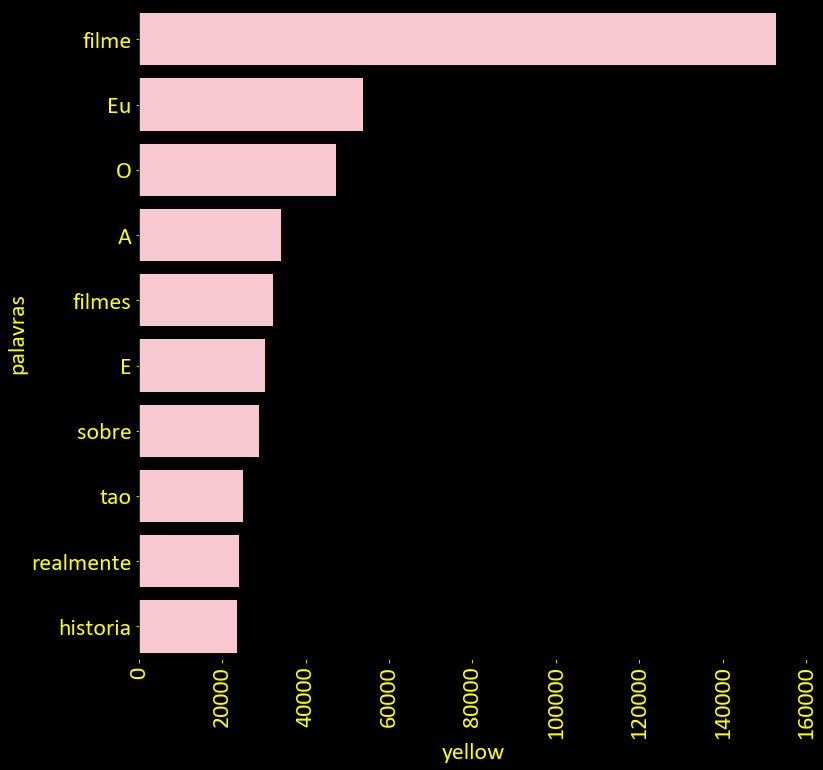

In [114]:
gera_freq_graph(resenhas, 'tratamento_v3', 10)

In [115]:
nuvem_generation_neg(resenhas, 'tratamento_v3')
nuvem_generation_pos(resenhas, 'tratamento_v3')

In [116]:
# IMPORTANDO TODAS BIBLI NECESSÁRIAS
import unidecode
import nltk
from nltk import tokenize
from string import punctuation
# CRIANDO LIST DE PALAVRAS IRELEVANTES:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

# CRIANDO LIST DE PONTUAÇÕES DESNECESSÁRIAS: 
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

# JUNTAR LISTA DE PONTUAÇõES COM STOPWORDS:
pontuacao_stopwords = pontuacao + palavras_irrelevantes + ['...']

# REMOVER ACENTUAÇÂO DAS LIST DE PUNCH + STOPWORDS
resenhas['tratamento_v3'] = [unidecode.unidecode(texto.lower()) for texto in resenhas['tratamento_v2']]

pontuacao_stopword_sem_acentos = [unidecode.unidecode(palavra) for palavra in pontuacao_stopwords]

print(pontuacao_stopwords_sem_ancentos)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 'a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'h

In [117]:
# RODA A LIMPEZA DOS ACENTOS, STOPWORDS E CARACTERES ESPECIAIS

# LISTA FINAL INICIA VAZIA
frase_processada = list()

# PARA CADA LINHA DAS RESENHAS NA COLUNA 'tratamento_v3' INTERAGE
for linha in resenhas['tratamento_v3']:
    # CRIA UMA NOVA LISTA QUE SERÁ COLOCADA NA LISTA PROCESSADA NO FINAL
    nova_frase = list()
    
    # QUEBRA AS PALAVRAS POR ESPAÇOS E POR CARACTERES ESPECIAIS
    palavras_texto = tokenize.WordPunctTokenizer().tokenize(linha.lower())
    
    # INTERAGE POR CADA PALAVRA DO TEXTO
    for palavra in palavras_texto:
        # VERIFICA SE A PALAVRA CONTÉM STOPWORD OU SE É PONTUAÇÃO
        if palavra not in pontuacao_stopwords_sem_ancentos:
            # CASO SE ENCAIXE NAS CONDIÇÕES, ADICIONA A PALAVRA NA NOVA FRASE
            nova_frase.append(palavra)
    
    # FINALIZA ADICIONANDO AS FRASES NA LISTA DE FRASES PROCESSADAS
    frase_processada.append(' '.join(nova_frase))

# FINALIZA O PROCESSO, SUBSTITUINDO A COLUNA 'tratamento_v3' NO DATAFRAME COM A NOVA LISTA PROCESSADA
resenhas['tratamento_v4'] = frase_processada

In [118]:
colunas_trabalhadas = ['text_pt', 'tratamento_v1', 'tratamento_v2', 'tratamento_v3', 'tratamento_v4']

for item in colunas_trabalhadas:
    print(f'A ACURACIA DE {item} :--->')
    classificar_texto(resenhas, item, 'classificacao')
    print('>' * 70)

A ACURACIA DE text_pt :--->
A ACURACIA PARA ESTE MODELO É DE 65.48 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v1 :--->
A ACURACIA PARA ESTE MODELO É DE 68.37 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v2 :--->
A ACURACIA PARA ESTE MODELO É DE 69.03 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v3 :--->
A ACURACIA PARA ESTE MODELO É DE 66.62 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v4 :--->
A ACURACIA PARA ESTE MODELO É DE 68.94 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [123]:
nuvem_generation_neg(resenhas, 'tratamento_v4')
nuvem_generation_pos(resenhas, 'tratamento_v4')

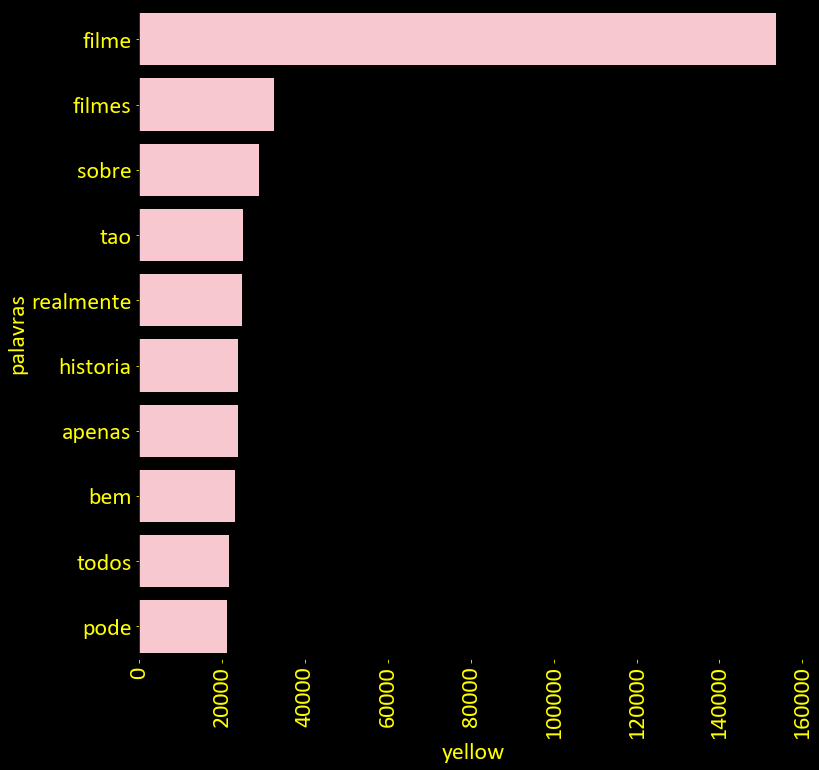

In [124]:
gera_freq_graph(resenhas, 'tratamento_v4', 10)

In [125]:
resenhas['tratamento_v4'][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [127]:
resenhas['text_pt'][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

## USANDO STEMMER

Esse modelo remove todos estruturadas de rabo de palavras mantendo somente o caule de origem de uma palavra, oque ajuda a agrupar as palavras semalhantes que possui pequenas diferenças de conjunações ou plural mantendo todos radicais comuns como um único fator relevante.
<br><br>
* REMOVE RADICAL
* MANTE DENOMINADOR COMUM
<br>
<br>

RSLP --> REMOVEDOR DE SUFIXO TRANSFORMA PALAVRAS EM RADICAIS COMUNS.

In [129]:
stemmer = nltk.RSLPStemmer()
stemmer.stem('corredor')

'corr'

A ACURACIA DE text_pt :--->
A ACURACIA PARA ESTE MODELO É DE 65.48 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v1 :--->
A ACURACIA PARA ESTE MODELO É DE 68.37 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v2 :--->
A ACURACIA PARA ESTE MODELO É DE 69.03 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v3 :--->
A ACURACIA PARA ESTE MODELO É DE 66.62 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v4 :--->
A ACURACIA PARA ESTE MODELO É DE 68.94 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v5 :--->
A ACURACIA PARA ESTE MODELO É DE 69.53 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


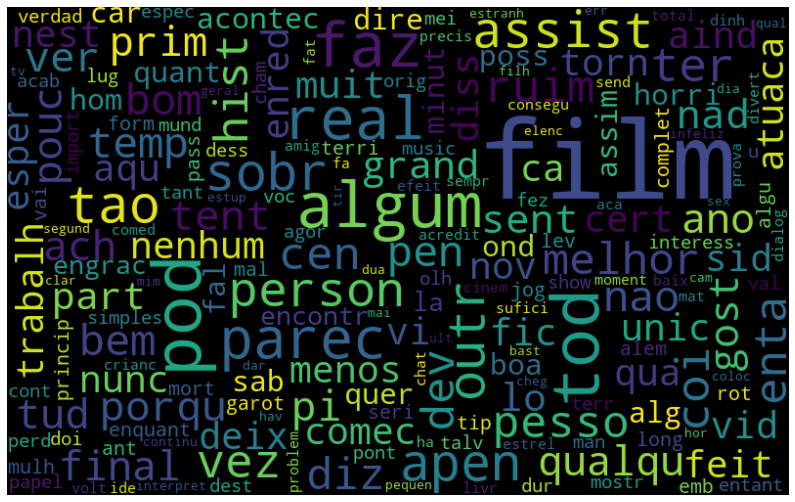

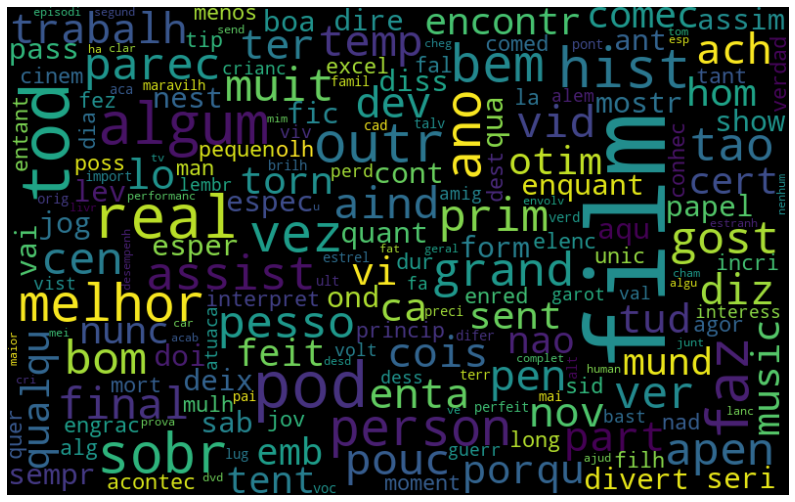

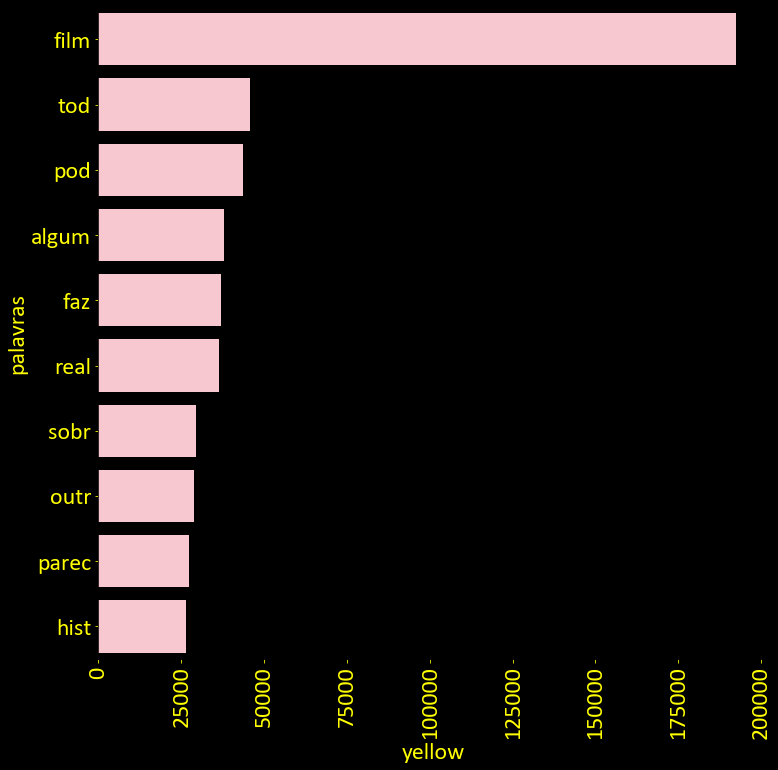

In [131]:
# RODA A LIMPEZA DOS ACENTOS, STOPWORDS E CARACTERES ESPECIAIS

# LISTA FINAL INICIA VAZIA
frase_processada = list()

# PARA CADA LINHA DAS RESENHAS NA COLUNA 'tratamento_v3' INTERAGE
for linha in resenhas['tratamento_v4']:
    # CRIA UMA NOVA LISTA QUE SERÁ COLOCADA NA LISTA PROCESSADA NO FINAL
    nova_frase = list()
    
    # QUEBRA AS PALAVRAS POR ESPAÇOS E POR CARACTERES ESPECIAIS
    palavras_texto = tokenize.WordPunctTokenizer().tokenize(linha.lower())
    
    # INTERAGE POR CADA PALAVRA DO TEXTO
    for palavra in palavras_texto:
        # VERIFICA SE A PALAVRA CONTÉM STOPWORD OU SE É PONTUAÇÃO
        if palavra not in pontuacao_stopwords_sem_ancentos:
            # CASO SE ENCAIXE NAS CONDIÇÕES, ADICIONA A PALAVRA NA NOVA FRASE e faz o STREMM
            nova_frase.append(stemmer.stem(palavra))
    
    # FINALIZA ADICIONANDO AS FRASES NA LISTA DE FRASES PROCESSADAS
    frase_processada.append(' '.join(nova_frase))

# FINALIZA O PROCESSO, SUBSTITUINDO A COLUNA 'tratamento_v3' NO DATAFRAME COM A NOVA LISTA PROCESSADA
resenhas['tratamento_v5'] = frase_processada

colunas_trabalhadas = ['text_pt', 'tratamento_v1', 'tratamento_v2', 'tratamento_v3', 'tratamento_v4', 'tratamento_v5']

for item in colunas_trabalhadas:
    print(f'A ACURACIA DE {item} :--->')
    classificar_texto(resenhas, item, 'classificacao')
    print('>' * 70)
    
nuvem_generation_neg(resenhas, 'tratamento_v5')
nuvem_generation_pos(resenhas, 'tratamento_v5')
gera_freq_graph(resenhas, 'tratamento_v5', 10)

## TF - IDF

Mexer na vetorização por frequencia dos termos e inversos da frequencia dos termos

<br><br>
frases: 
<br>
<br>
    'assistir um filme ótimo'
<br>
    'assisitr um filme péssimo'
    
<br>
<br>
    
|assistir| um | filme | ótimo | péssimo|
|--------|----|-------|-------|--------|
| 10     | 10 | 10    | 20    | 0     |
| 10     | 10 | 10     | 0    | 20     |
    
    
<br>
<br>

as palavras recebem pesos conforme a probalidade de aparição da mesma na palavra, palavras que aparecem constatemente recebem pesos menores

In [135]:
resenhas['tratamento_v3'][0]


'mais vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens a maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava o personagem deveriamos importar arrogante superconfiante ashton kutcher o problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado seu unico obstaculo parece vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers somos informados kutcher levado melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ['assistir um filme ótimo', 'assistir um filme péssimo']

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteristicas = tfidf.fit_transform(frases)

valores_convertidos_test = pd.DataFrame(
    caracteristicas.todense(), 
    columns=tfidf.get_feature_names()
)

valores_convertidos_test.head()

assistir     filme   péssimo        um     ótimo
0  0.448321  0.448321  0.000000  0.448321  0.630099
1  0.448321  0.448321  0.630099  0.448321  0.000000

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer

def classificar_texto_tf_idf(texto, coluna_features, coluna_class):
    
    # Cria Bag of words para cada uma das resenhas na columm com nome coluna_features
    tfidf = TfidfVectorizer(lowercase=False, max_features=50)
    bag_of_words = tfidf.fit_transform(texto[coluna_features])
    
    # Seta um seed randomico para não ter problemas com outras resultados nos testes
    SEED = 123
    np.random.seed(SEED)

    # define quais serão a features e quais serão as class para o treino e teste.
    x = bag_of_words
    y = resenhas[coluna_class]

    x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                        random_state=SEED,
                                                        stratify=y,
                                                        test_size=0.25)

    # Realiza o modelo de predição linear com machine learn
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(x_train, y_train)
    acuracia = (regressao_logistica.score(x_test, y_test)*100).round(2)
    print(f'A ACURACIA PARA ESTE MODELO É DE {acuracia} (%) ')
    

In [141]:
resenhas['tratamento_v5'] = frase_processada

colunas_trabalhadas = ['text_pt', 'tratamento_v1', 'tratamento_v2', 'tratamento_v3', 'tratamento_v4', 'tratamento_v5']

for item in colunas_trabalhadas:
    print(f'A ACURACIA DE {item} :--->')
    classificar_texto_tf_idf(resenhas, item, 'classificacao')
    print('>' * 70)
    

A ACURACIA DE text_pt :--->
A ACURACIA PARA ESTE MODELO É DE 65.6 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v1 :--->
A ACURACIA PARA ESTE MODELO É DE 68.35 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v2 :--->
A ACURACIA PARA ESTE MODELO É DE 69.09 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v3 :--->
A ACURACIA PARA ESTE MODELO É DE 66.7 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v4 :--->
A ACURACIA PARA ESTE MODELO É DE 69.16 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v5 :--->
A ACURACIA PARA ESTE MODELO É DE 69.83 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


## MGrams

Gera em memória pares de palavras que ajustam a validação dos dados em grupos destintos como ex 'um filme'



In [148]:
from nltk import ngrams

frase = 'assistir um ótimo filme'
frase_separada = tokenize.WhitespaceTokenizer().tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('assistir', 'um'), ('um', 'ótimo'), ('ótimo', 'filme')]

In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer

def classificar_texto_ngrams(texto, coluna_features, coluna_class):
    
    # Cria Bag of words para cada uma das resenhas na columm com nome coluna_features
    tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
    bag_of_words = tfidf.fit_transform(texto[coluna_features])
    
    # Seta um seed randomico para não ter problemas com outras resultados nos testes
    SEED = 123
    np.random.seed(SEED)

    # define quais serão a features e quais serão as class para o treino e teste.
    x = bag_of_words
    y = resenhas[coluna_class]

    x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                        random_state=SEED,
                                                        stratify=y,
                                                        test_size=0.25)

    # Realiza o modelo de predição linear com machine learn
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(x_train, y_train)
    acuracia = (regressao_logistica.score(x_test, y_test)*100).round(2)
    print(f'A ACURACIA PARA ESTE MODELO É DE {acuracia} (%) ')
    

In [151]:
resenhas['tratamento_v5'] = frase_processada

colunas_trabalhadas = ['text_pt', 'tratamento_v1', 'tratamento_v2', 'tratamento_v3', 'tratamento_v4', 'tratamento_v5']

for item in colunas_trabalhadas:
    print(f'A ACURACIA DE {item} :--->')
    classificar_texto_ngrams(resenhas, item, 'classificacao')
    print('>' * 70)

A ACURACIA DE text_pt :--->
A ACURACIA PARA ESTE MODELO É DE 88.54 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v1 :--->
A ACURACIA PARA ESTE MODELO É DE 88.46 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v2 :--->
A ACURACIA PARA ESTE MODELO É DE 88.42 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v3 :--->
A ACURACIA PARA ESTE MODELO É DE 88.52 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v4 :--->
A ACURACIA PARA ESTE MODELO É DE 88.46 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
A ACURACIA DE tratamento_v5 :--->
A ACURACIA PARA ESTE MODELO É DE 88.74 (%) 
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
